In [3]:
import requests
import json
import pandas as pd
import io

Download "conservation status" and "taxon" parameter from Feature of interest "animal occurrence" using EcoPlots API.<br><br>
<b>Output format:</b> ndjson.


In [4]:
url = "https://ecoplots-test.tern.org.au/api/v1.0/observations?dformat=ndjson"

payload = json.dumps({
  "query": {
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/2361dea8-598c-4b6f-a641-2b98ff199e9e"
    ],
    "observed_property": [
      "http://linked.data.gov.au/def/tern-cv/70646576-6dc7-4bc5-a9d8-c4c366850df0",
      "http://linked.data.gov.au/def/tern-cv/1466cc29-350d-4a23-858b-3da653fd24a6"
    ]
  }
  ,
  "page_number":1,
  "page_size": 10000
})

headers = {
  'X-Api-Key': 'apikey',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

# print(response.text)

Read API response using pandas. <b>NOTE:</b> use lines=True to read ndjson data

In [5]:
df = pd.read_json(io.BytesIO(response.content), lines=True)
len(df)

10000

In [7]:
df.head(10)


dataset  \
0  Williams Wet Tropics Vertebrate database   
1  Williams Wet Tropics Vertebrate database   
2  Williams Wet Tropics Vertebrate database   
3  Williams Wet Tropics Vertebrate database   
4  Williams Wet Tropics Vertebrate database   
5  Williams Wet Tropics Vertebrate database   
6  Williams Wet Tropics Vertebrate database   
7  Williams Wet Tropics Vertebrate database   
8  Williams Wet Tropics Vertebrate database   
9  Williams Wet Tropics Vertebrate database   

                                           datasetId  \
0  http://linked.data.gov.au/dataset/wet-tropics-...   
1  http://linked.data.gov.au/dataset/wet-tropics-...   
2  http://linked.data.gov.au/dataset/wet-tropics-...   
3  http://linked.data.gov.au/dataset/wet-tropics-...   
4  http://linked.data.gov.au/dataset/wet-tropics-...   
5  http://linked.data.gov.au/dataset/wet-tropics-...   
6  http://linked.data.gov.au/dataset/wet-tropics-...   
7  http://linked.data.gov.au/dataset/wet-tropics-...   
8  http://linked.data.gov.au/dataset/wet-tropics-...   
9  http://linked.data.gov.au/dataset/wet-tropics-...   

                                           featureId        featureType  \
0  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
1  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
2  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
3  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
4  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
5  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
6  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
7  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
8  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
9  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   

                                       featureTypeId  \
0  http://linked.data.gov.au/def/tern-cv/2361dea8...   
1  http://linked.data.gov.au/def/tern-cv/2361dea8...   
2  http://linked.data.gov.au/def/tern-cv/2361dea8...   
3  http://linked.data.gov.au/def/tern-cv/2361dea8...   
4  http://linked.data.gov.au/def/tern-cv/2361dea8...   
5  http://linked.data.gov.au/def/tern-cv/2361dea8...   
6  http://linked.data.gov.au/def/tern-cv/2361dea8...   
7  http://linked.data.gov.au/def/tern-cv/2361dea8...   
8  http://linked.data.gov.au/def/tern-cv/2361dea8...   
9  http://linked.data.gov.au/def/tern-cv/2361dea8...   

                                       observationId            resultTime  \
0  http://linked.data.gov.au/dataset/wet-tropics-...  2001-01-24T00:00:00Z   
1  http://linked.data.gov.au/dataset/wet-tropics-...  2008-08-10T00:00:00Z   
2  http://linked.data.gov.au/dataset/wet-tropics-...  2013-08-14T00:00:00Z   
3  http://linked.data.gov.au/dataset/wet-tropics-...  2012-11-08T00:00:00Z   
4  http://linked.data.gov.au/dataset/wet-tropics-...  2010-10-20T00:00:00Z   
5  http://linked.data.gov.au/dataset/wet-tropics-...  2007-10-28T00:00:00Z   
6  http://linked.data.gov.au/dataset/wet-tropics-...  2007-10-28T00:00:00Z   
7  http://linked.data.gov.au/dataset/wet-tropics-...  2005-11-19T00:00:00Z   
8  http://linked.data.gov.au/dataset/wet-tropics-...  2000-05-11T00:00:00Z   
9  http://linked.data.gov.au/dataset/wet-tropics-...  2013-08-21T00:00:00Z   

  parameter                                        parameterId  \
0     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
1     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
2     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
3     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
4     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
5     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
6     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
7     taxon  http://linked.data.gov.au/def/tern-cv/70646576...   
8    

In [8]:
df['dataset'].unique().tolist()

['Williams Wet Tropics Vertebrate database']

In [9]:
df['parameter'].unique().tolist()

['taxon', 'conservation status']

In [10]:
df[['featureId','result']]

featureId  \
0     http://linked.data.gov.au/dataset/wet-tropics-...   
1     http://linked.data.gov.au/dataset/wet-tropics-...   
2     http://linked.data.gov.au/dataset/wet-tropics-...   
3     http://linked.data.gov.au/dataset/wet-tropics-...   
4     http://linked.data.gov.au/dataset/wet-tropics-...   
...                                                 ...   
9995  http://linked.data.gov.au/dataset/wet-tropics-...   
9996  http://linked.data.gov.au/dataset/wet-tropics-...   
9997  http://linked.data.gov.au/dataset/wet-tropics-...   
9998  http://linked.data.gov.au/dataset/wet-tropics-...   
9999  http://linked.data.gov.au/dataset/wet-tropics-...   

                                            result  
0     Platycercus (Platycercus) elegans nigrescens  
1             Philemon (Philemon) buceroides yorki  
2             Philemon (Philemon) buceroides yorki  
3             Philemon (Philemon) buceroides yorki  
4                            Lampropholis robertsi  
...                                            ...  
9995                     Symposiarchus trivirgatus  
9996                     Scenopoeetes dentirostris  
9997                     Scenopoeetes dentirostris  
9998                     Symposiarchus trivirgatus  
9999                     Symposiarchus trivirgatus  

[10000 rows x 2 columns]

Pivot data converting "long" format to "wide" format. It creates a new dataframe with all parameters (status and taxon) from the same FOI instance in the same row, as columns

In [11]:
df_pivot = (df.pivot(index='featureId',columns="parameter", values="result"))
len(df_pivot)

9995

In [12]:
df_pivot.head(7)

parameter                                          conservation status  \
featureId                                                                
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   
http://linked.data.gov.au/dataset/wet-tropics-v...                 NaN   

parameter                                                                                     taxon  
featureId                                                                                            
http://linked.data.gov.au/dataset/wet-tropics-v...                    Casuarius casuarius johnsonii  
http://linked.data.gov.au/dataset/wet-tropics-v...                    Casuarius casuarius johnsonii  
http://linked.data.gov.au/dataset/wet-tropics-v...                    Casuarius casuarius johnsonii  
http://linked.data.gov.au/dataset/wet-tropics-v...  Colluricincla (Myiolestes) megarhyncha griseata  
http://linked.data.gov.au/dataset/wet-tropics-v...    Pachycephala (Mattingleya) simplex peninsulae  
http://linked.data.gov.au/dataset/wet-tropics-v...  Colluricincla (Myiolestes) megarhyncha griseata  
http://linked.data.gov.au/dataset/wet-tropics-v...  Colluricincla (Myiolestes) megarhyncha griseata

Join both dataframes

In [13]:
df_merged = df.merge(df_pivot, on='featureId').drop_duplicates(subset="featureId").drop(columns=["parameter", "parameterId", "result", "resultId", "resultUnit", "resultUnitId"])

In [14]:
df_merged.head(10)

dataset  \
0  Williams Wet Tropics Vertebrate database   
1  Williams Wet Tropics Vertebrate database   
2  Williams Wet Tropics Vertebrate database   
3  Williams Wet Tropics Vertebrate database   
4  Williams Wet Tropics Vertebrate database   
5  Williams Wet Tropics Vertebrate database   
6  Williams Wet Tropics Vertebrate database   
7  Williams Wet Tropics Vertebrate database   
8  Williams Wet Tropics Vertebrate database   
9  Williams Wet Tropics Vertebrate database   

                                           datasetId  \
0  http://linked.data.gov.au/dataset/wet-tropics-...   
1  http://linked.data.gov.au/dataset/wet-tropics-...   
2  http://linked.data.gov.au/dataset/wet-tropics-...   
3  http://linked.data.gov.au/dataset/wet-tropics-...   
4  http://linked.data.gov.au/dataset/wet-tropics-...   
5  http://linked.data.gov.au/dataset/wet-tropics-...   
6  http://linked.data.gov.au/dataset/wet-tropics-...   
7  http://linked.data.gov.au/dataset/wet-tropics-...   
8  http://linked.data.gov.au/dataset/wet-tropics-...   
9  http://linked.data.gov.au/dataset/wet-tropics-...   

                                           featureId        featureType  \
0  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
1  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
2  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
3  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
4  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
5  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
6  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
7  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
8  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   
9  http://linked.data.gov.au/dataset/wet-tropics-...  animal occurrence   

                                       featureTypeId  \
0  http://linked.data.gov.au/def/tern-cv/2361dea8...   
1  http://linked.data.gov.au/def/tern-cv/2361dea8...   
2  http://linked.data.gov.au/def/tern-cv/2361dea8...   
3  http://linked.data.gov.au/def/tern-cv/2361dea8...   
4  http://linked.data.gov.au/def/tern-cv/2361dea8...   
5  http://linked.data.gov.au/def/tern-cv/2361dea8...   
6  http://linked.data.gov.au/def/tern-cv/2361dea8...   
7  http://linked.data.gov.au/def/tern-cv/2361dea8...   
8  http://linked.data.gov.au/def/tern-cv/2361dea8...   
9  http://linked.data.gov.au/def/tern-cv/2361dea8...   

                                       observationId            resultTime  \
0  http://linked.data.gov.au/dataset/wet-tropics-...  2001-01-24T00:00:00Z   
1  http://linked.data.gov.au/dataset/wet-tropics-...  2008-08-10T00:00:00Z   
2  http://linked.data.gov.au/dataset/wet-tropics-...  2013-08-14T00:00:00Z   
3  http://linked.data.gov.au/dataset/wet-tropics-...  2012-11-08T00:00:00Z   
4  http://linked.data.gov.au/dataset/wet-tropics-...  2010-10-20T00:00:00Z   
5  http://linked.data.gov.au/dataset/wet-tropics-...  2007-10-28T00:00:00Z   
6  http://linked.data.gov.au/dataset/wet-tropics-...  2007-10-28T00:00:00Z   
7  http://linked.data.gov.au/dataset/wet-tropics-...  2005-11-19T00:00:00Z   
8  http://linked.data.gov.au/dataset/wet-tropics-...  2000-05-11T00:00:00Z   
9  http://linked.data.gov.au/dataset/wet-tropics-...  2013-08-21T00:00:00Z   

       method                                           methodId instrumentId  \
0  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
1  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
2  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
3  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
4  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
5  STD method  http://linked.data.gov.au/def/tern-cv/5c74f891...          N/A   
6  STD method  http://linked.dat

plot the species occurrence

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

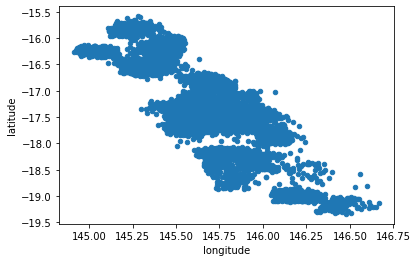

In [18]:
import matplotlib as plt
df_merged.plot(x="longitude", y="latitude", kind="scatter")

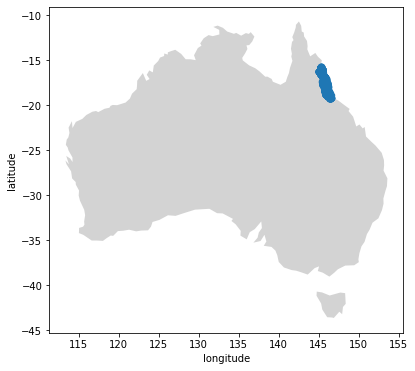

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)
df_merged[["latitude", "longitude"]].plot.scatter(x="longitude", y="latitude", ax=ax)

# add grid
plt.show()